In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

4423680/4422102 [==============================] - 5s 1us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


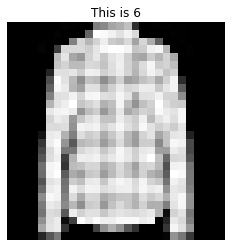

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
i = random.randint(0, 59999)
plt.title("This is {}".format(y_train[i]))
plt.axis("off")
plt.imshow(x_train[i], cmap="gray")

In [11]:
from keras.models import Sequential
#Dense : 全連接層
from keras.layers import Dense
model = Sequential()     
#784 * 128(全連接) + 128(bias) =100480
model.add(Dense(128, activation = "relu", input_dim = 784))
#128* 10(全連接) + 10 (bias) = 1290
model.add(Dense(10, activation="softmax"))
model.summary()
#Parm = 1290是可以調整的參數量

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
#loss: 跟正確答案的距離
# optimizer: 梯度下降的優化器
model.compile(loss= "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
#把圖片設定0-1或-1到1之間

In [13]:
from keras.utils.np_utils import to_categorical
x_train_norm=x_train.reshape(-1, 784)/ 255  #把數字都放到0-1之間
x_test_norm =x_test.reshape(-1, 784)/ 255
y_train_cat = to_categorical(y_train, 10)#要是訓試資料沒有10種，就死掉了
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [14]:
# batch_size： 看多少資料再平均做一次調整, 100-200(建議), 5-20(大圖片)
# epoch : 整份訓練資料到底要看過幾遍(控制模型什麼時侯該訓練完成)
# volidation_split：(train_test_split)切分多少測試資料出來
# verbose：(log要有多少程度) 1(預設)：會有進度條 2：必要資訊 0：安靜
model.fit(x_train_norm, y_train_cat,
          batch_size = 200,
          epochs = 15,
          validation_split= 0.1,
          verbose =2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.6121 - accuracy: 0.7925 - val_loss: 0.4613 - val_accuracy: 0.8370
Epoch 2/15
 - 1s - loss: 0.4267 - accuracy: 0.8525 - val_loss: 0.4015 - val_accuracy: 0.8615
Epoch 3/15
 - 1s - loss: 0.3845 - accuracy: 0.8638 - val_loss: 0.3878 - val_accuracy: 0.8623
Epoch 4/15
 - 1s - loss: 0.3555 - accuracy: 0.8734 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 5/15
 - 1s - loss: 0.3377 - accuracy: 0.8788 - val_loss: 0.3472 - val_accuracy: 0.8743
Epoch 6/15
 - 1s - loss: 0.3224 - accuracy: 0.8851 - val_loss: 0.3406 - val_accuracy: 0.8737
Epoch 7/15
 - 1s - loss: 0.3096 - accuracy: 0.8877 - val_loss: 0.3355 - val_accuracy: 0.8785
Epoch 8/15
 - 1s - loss: 0.2951 - accuracy: 0.8937 - val_loss: 0.3288 - val_accuracy: 0.8777
Epoch 9/15
 - 1s - loss: 0.2899 - accuracy: 0.8950 - val_loss: 0.3366 - val_accuracy: 0.8753
Epoch 10/15
 - 1s - loss: 0.2776 - accuracy: 0.8990 - val_loss: 0.3188 - val_accuracy: 0.8808
Epoch 11/15
 - 1s - 

In [15]:
# 先做個loss, accuracy
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.33240159776210787, 0.8833000063896179]

In [16]:
# confusion matrix
# sklearn : predict_proba, predict
# keras : prdict, predict_classes
#如果你要對list裡面所有東西做轉換：list(map(lambda x:x**2,[1,2,3]))
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(i) for i in range(10)]
c = ["{}(預測)".format(i) for i in range(10)]
mat = confusion_matrix(y_test, pre)

convert = []
#mat.astype("float64")
for row in mat:
    r = np.array(row) / sum(row) * 100
    r = list(map(lambda x:"{}%".format(round(x,2)),  r))
    convert.append(r)
pd.DataFrame(convert,
             index = i,
             columns = c)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),86.4%,0.2%,1.2%,2.0%,0.7%,0.3%,8.8%,0.0%,0.4%,0.0%
1(正確),0.2%,97.3%,0.0%,1.8%,0.4%,0.0%,0.3%,0.0%,0.0%,0.0%
2(正確),1.5%,0.0%,75.4%,0.9%,12.3%,0.0%,9.8%,0.0%,0.1%,0.0%
3(正確),2.3%,1.0%,0.8%,88.3%,3.8%,0.0%,3.4%,0.0%,0.4%,0.0%
4(正確),0.0%,0.1%,6.4%,2.5%,83.1%,0.0%,7.9%,0.0%,0.0%,0.0%
5(正確),0.0%,0.0%,0.0%,0.1%,0.0%,96.2%,0.0%,2.5%,0.1%,1.1%
6(正確),13.4%,0.2%,6.2%,2.8%,5.9%,0.0%,70.3%,0.0%,1.2%,0.0%
7(正確),0.0%,0.0%,0.0%,0.0%,0.0%,2.0%,0.0%,96.6%,0.1%,1.3%
8(正確),0.7%,0.0%,0.5%,0.3%,0.8%,0.4%,0.4%,0.5%,96.4%,0.0%
9(正確),0.0%,0.0%,0.0%,0.0%,0.0%,1.0%,0.1%,5.6%,0.0%,93.3%


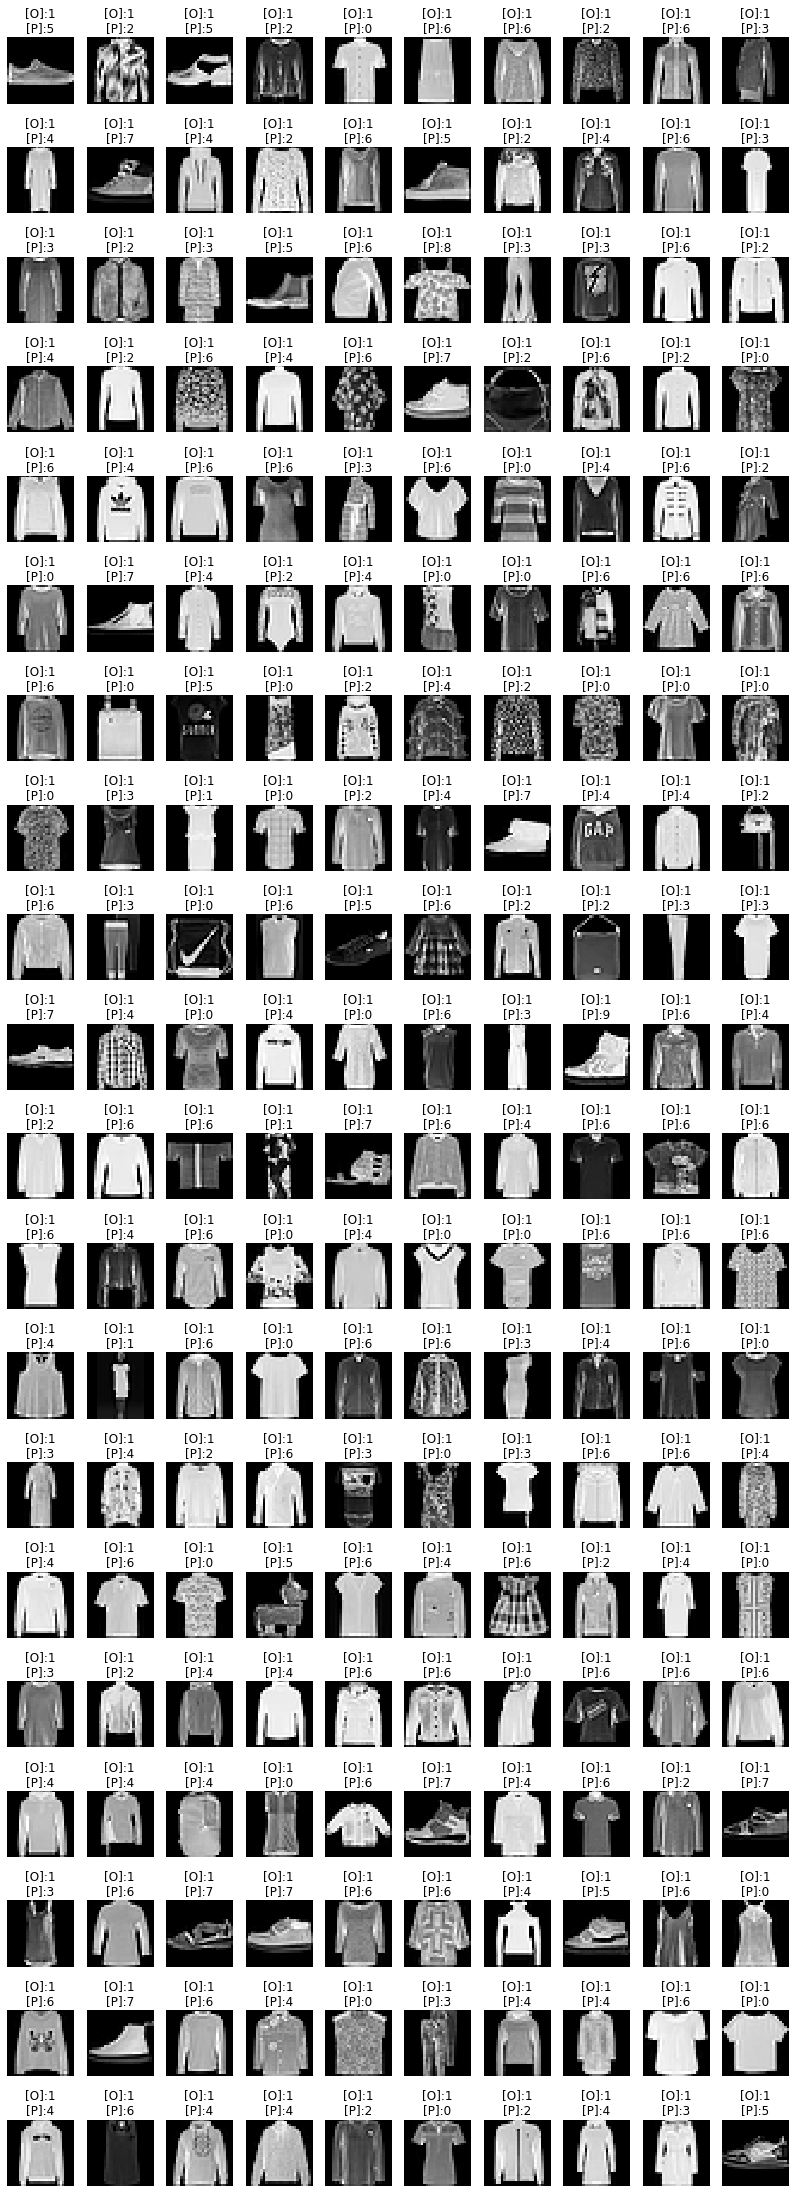

In [21]:
# np: !=來比較每個的相等
# nonzero: 找到所有不為0的位置
# [類似list] -> 把所有東西一次拿給你
idx = np.nonzero(pre != y_test)[0][:200] #!=不相等

false_label = y_test[idx]
false_pre = pre[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14,42))

false_collection = zip(false_label, false_pre, false_img)
# 得到每一個： (index, (false_label,pre, img))
for i, (l, p, img) in enumerate(false_collection):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(1, p)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap= "gray")

機率最高的: [3]
是 3 的機率: 0.7789191
是 9 的機率: 0.16213621
是 8 的機率: 0.05719852
是 5 的機率: 0.0016811073
是 7 的機率: 2.8354258e-05
是 4 的機率: 2.5316704e-05
是 1 的機率: 7.274972e-06
是 2 的機率: 4.1007547e-06
是 0 的機率: 2.2029804e-08
是 6 的機率: 2.9497385e-10


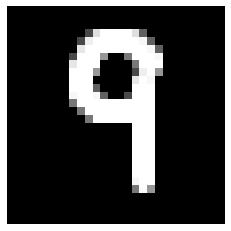

In [21]:
from keras.preprocessing.image import load_img
fp = ("nine.png")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(-1,784) /255
ans = model.predict_classes(img_np)
print("機率最高的:", ans)
pre = model.predict(img_np)[0]
z = zip(list(range(10)),pre)
for i,p in sorted(z, key=lambda x:x[1], reverse = True):
    print("是", i, "的機率:", p)
plt.axis("off")
plt.imshow(img, cmap = "gray")

In [22]:
#如果你想看: https://support.hdfgroup.org/products/java/release/download.html
model.save("mlp.h5")

In [23]:
# 讀取： predict直接使用
# fit不需要compile
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.model.evaluate(x_test_norm, y_test_cat)

 5344/10000 [===============>..............] - ETA: 0s

c:\users\a30\appdata\local\programs\python\python37\lib\site-packages\keras\engine\sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


10000/10000 [==============================] - 0s 22us/step


[0.07700620553670451, 0.9764000177383423]

In [17]:
#sorted排序教學
sorted([("Amy",5),("Carol",4),("Bob",3)],
       key = lambda t:t[1])

[('Bob', 3), ('Carol', 4), ('Amy', 5)]